## Problem 2

In [219]:
# X|(Y= 1) is a t-distribution with 1 degree of freedom with mean μ1
# X|(Y= -1) is a t-distribution with 1 degree of freedom with mean 0
# P(Y = 1) = 0.5

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt


### part a.

In [220]:
n = 100
mu = 1 


def GeneratingData(mu, n):
    # P(Y=1) = 0.5
    # Generating the data
    data = np.where(np.random.binomial(1,0.5,100) == 0, -1, 1)
    # Y = np.where(data == 0, -1, 1)
    

    # X|(Y = 1) 
    X1 = data[data==1]
    X1t = np.random.standard_t(1, len(X1)) + mu

    # X|(Y = −1)
    X_1 = data[data==-1]
    X_1t = np.random.standard_t(1, len(X_1))
    # Create train data X
    X1t = X1t.reshape(-1, 1)
    X_1t = X_1t.reshape(-1, 1)

    X = np.concatenate((X1t, X_1t))
    Y = np.repeat([1,-1],(len(X1),len(X_1)))

    return X, Y


# GeneratingData(1, 100)


In [221]:
# Train Logistic regression / LDA

LRTesterror = list()
LDATesterror = list()

LR = LogisticRegression()
LDA = LinearDiscriminantAnalysis()



# LR.fit(X_train, Y_train)
# LDA.fit(X_test, Y_test)

for i in range(100):

    X_train, Y_train = GeneratingData(1, 100)
    X_test, Y_test = GeneratingData(1, 100)

    LR.fit(X_train, Y_train)
    LDA.fit(X_test, Y_test)

    LRerror = sum(Y_test != LR.predict(X_test))
    LDAerror = sum(Y_test != LDA.predict(X_test))
    LRTesterror.append(LRerror)
    LDATesterror.append(LDAerror)




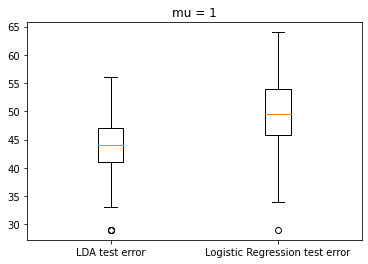

Logistic Regression test when u1 = 1
Mean  : 49.28 
Variance : 45.64159999999999


Linear Discriminant Analysis test when u1 = 1
Mean : 43.55
Variance :  23.0475


In [222]:
# Plot a box-plot of the test error of logistic regression and LDA for 100 trials. 

fig, ax = plt.subplots()
ax.boxplot([LDATesterror, LRTesterror])
plt.xticks([1, 2], ['LDA test error', 'Logistic Regression test error'])
plt.title("mu = 1")
plt.show()


print("Logistic Regression test when u1 = 1")
print(f"Mean  : {np.mean(LRTesterror)} ")
print(f"Variance : {np.var(LRTesterror)}") 
print("\n")
print("Linear Discriminant Analysis test when u1 = 1")
print(f"Mean : {np.mean(LDATesterror)}")
print(f"Variance :  {np.var(LDATesterror)}")

#### part b.

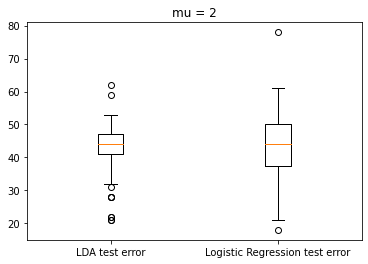

Logistic Regression test when u1 = 2
Mean  : 42.71 
Variance : 100.72589999999998


Linear Discriminant Analysis test when u1 = 2
Mean : 43.09
Variance :  48.161899999999996


In [223]:
# mu = 2


LRTesterror = list()
LDATesterror = list()


for i in range(100):

    LR = LogisticRegression()
    LDA = LinearDiscriminantAnalysis()


    X_train, Y_train = GeneratingData(2, 100)
    X_test, Y_test = GeneratingData(2, 100)

    LR.fit(X_train, Y_train)
    LDA.fit(X_test, Y_test)

    LRerror = sum(Y_test != LR.predict(X_test))
    LDAerror = sum(Y_test != LDA.predict(X_test))
    LRTesterror.append(LRerror)
    LDATesterror.append(LDAerror)

# Plot a box-plot of the test error of logistic regression and LDA for 100 trials. 

fig, ax = plt.subplots()
ax.boxplot([LDATesterror, LRTesterror])
plt.xticks([1, 2], ['LDA test error', 'Logistic Regression test error'])
plt.title("mu = 2")
plt.show()

print("Logistic Regression test when u1 = 2")
print(f"Mean  : {np.mean(LRTesterror)} ")
print(f"Variance : {np.var(LRTesterror)}") 
print("\n")
print("Linear Discriminant Analysis test when u1 = 2")
print(f"Mean : {np.mean(LDATesterror)}")
print(f"Variance :  {np.var(LDATesterror)}")

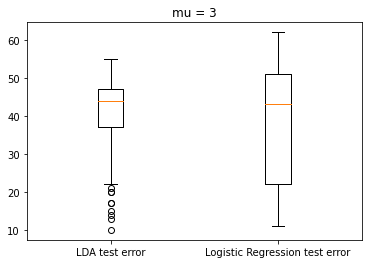

Logistic Regression test when u1 = 3
Mean  : 37.79 
Variance : 220.98590000000004


Linear Discriminant Analysis test when u1 = 3
Mean : 40.2
Variance :  100.58


In [224]:
# mu = 3

LRTesterror = list()
LDATesterror = list()


for i in range(100):

    LR = LogisticRegression()
    LDA = LinearDiscriminantAnalysis()


    X_train, Y_train = GeneratingData(3, 100)
    X_test, Y_test = GeneratingData(3, 100)

    LR.fit(X_train, Y_train)
    LDA.fit(X_test, Y_test)

    LRerror = sum(Y_test != LR.predict(X_test))
    LDAerror = sum(Y_test != LDA.predict(X_test))
    LRTesterror.append(LRerror)
    LDATesterror.append(LDAerror)

fig, ax = plt.subplots()
ax.boxplot([LDATesterror, LRTesterror])
plt.xticks([1, 2], ['LDA test error', 'Logistic Regression test error'])
plt.title("mu = 3")
plt.show()


print("Logistic Regression test when u1 = 3")
print(f"Mean  : {np.mean(LRTesterror)} ")
print(f"Variance : {np.var(LRTesterror)}") 
print("\n")
print("Linear Discriminant Analysis test when u1 = 3")
print(f"Mean : {np.mean(LDATesterror)}")
print(f"Variance :  {np.var(LDATesterror)}")

## Problem 3

##### (a) Sketch the observations

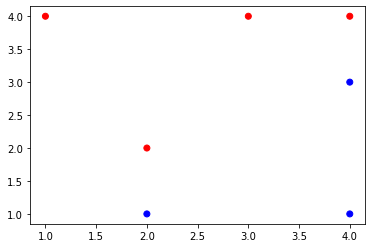

In [225]:
x1 = np.array([3,2,4,1,2,4,4])
x2 = np.array([4,2,4,4,1,3,1])
cols = np.array(["red", "red", "red", "red", "blue", "blue", "blue"])

plt.scatter(x1, x2, color = cols)
plt.show();

#### (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1))

We can point out two coordinates that should fit the optimal separating hyperplane. The first point should be in between the coordinate (2, 2) and the coordinate (2, 1), and the second point should be in between (4, 4) and (4, 3). Thus, the line should fit in (2, 1.5) and (4, 3.5). 

The equation is : $Y = X - 0.5$

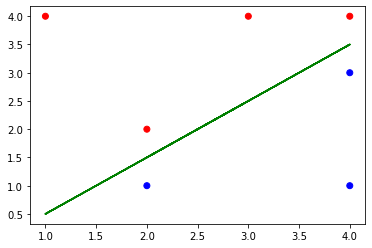

In [226]:
X = np.concatenate((x1, x2))
Y = X - 0.5

plt.scatter(x1, x2, color = cols)
plt.plot(X, Y, '-g')

plt.show();


#### (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise, where β0 = 0.5, β1 = -1, β2 = 1. 

#### (d) On your sketch, indicate the margin for the maximal margin hyperplane.

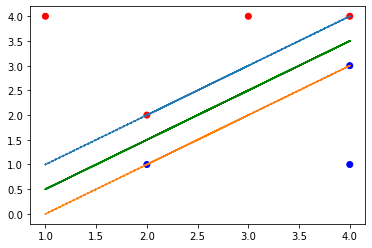

In [227]:
X = np.concatenate((x1, x2))
Y = X - 0.5
Yred = X 
Yblue = X - 1

plt.scatter(x1, x2, color = cols)
plt.plot(X, Y, '-g')
plt.plot(X, Yred, ':')
plt.plot(X, Yblue, ':')
plt.show();

Here, the maximal margin hyperplane are the blue line and the orange line. 

#### (e) Indicate the support vectors for the maximal margin classifier

The support vectors are the points (2,2), (4,4), (2,1) and (4,3).

#### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane

Since the seventh observation is (4,1), it should go beyond the orange line on the above graph to affect the maximal margin hyperplane. Otherwise, just a slight movement would not affect the maximal margin hyperplane. 

#### (g) Sketch a hyper plane that is not the optimal separating hyper- plane, and provide the equation for this hyper plane.

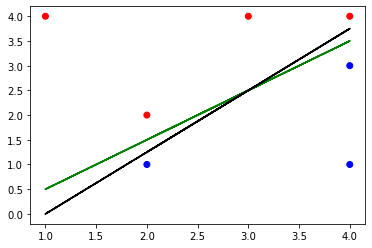

In [228]:
X = np.concatenate((x1, x2))
Y = X - 0.5
Y_ = 1.25*X - 1.25

plt.scatter(x1, x2, color = cols)
plt.plot(X, Y, '--', color='green')
plt.plot(X, Y_, '--', color='black')

plt.show();


#### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.